In [10]:
import matplotlib.pyplot as plt
import mplcursors

from matplotlib.ticker import MultipleLocator, FuncFormatter
from matplotlib.cm import get_cmap


def compound_interest_with_contributions(principal, rate, time, compounding_frequency, contributions):
    """
    Calculate compound interest with additional contributions.

    Parameters:
    - principal: The principal amount (initial investment/loan amount).
    - rate: The annual interest rate (as a decimal).
    - time: The time the money is invested or borrowed for (in years).
    - compounding_frequency: The number of times interest is compounded per year.
    - contributions: The amount of additional contributions made at each compounding period.

    Returns:
    The future value of the investment/loan, including compound interest and contributions.
    """
    rate_per_period = rate / compounding_frequency
    total_compounding_periods = compounding_frequency * time
    future_value = principal * (1 + rate_per_period / compounding_frequency) ** total_compounding_periods

    contribution_value = contributions * (((1 + rate_per_period / compounding_frequency) ** total_compounding_periods) - 1) / (rate_per_period / compounding_frequency)
    future_value += contribution_value

    return future_value

def calculate_future_value_range_by_year(principal, time, compounding_frequency, contributions, apr_range):
    """
    Calculate future value for a range of APR values, broken down by year.

    Parameters:
    - principal: The principal amount (initial investment/loan amount).
    - time: The time the money is invested or borrowed for (in years).
    - compounding_frequency: The number of times interest is compounded per year.
    - contributions: The amount of additional contributions made at each compounding period.
    - apr_range: A tuple representing the range of APR values (start, end).

    Returns:
    A dictionary with APR values as keys and lists of future values for each year.
    """
    future_values_by_year = {apr: [] for apr in range(apr_range[0], apr_range[1] + 1)}

    for apr in range(apr_range[0], apr_range[1] + 1):
        annual_interest_rate = apr / 100.0  # Convert percentage to decimal

        for year in range(1, time + 1):
            future_value = compound_interest_with_contributions(principal, annual_interest_rate, year, compounding_frequency, contributions)
            future_values_by_year[apr].append(future_value)

    return future_values_by_year

In [18]:
# Example usage:
principal_amount = 10000
investment_time = 5  # 5 years
compounding_frequency = 4  # Quarterly compounding
monthly_contributions = 200  # Additional monthly contributions
apr_range = (8, 12)  # APR range from 8% to 11%

future_values_by_year = calculate_future_value_range_by_year(principal_amount, investment_time, compounding_frequency, monthly_contributions, apr_range)
print(future_values_by_year)

{8: [11007.52503124998, 12035.352196271868, 13083.890593224914, 14153.557563801103, 15244.77885933642], 9: [11033.680914747618, 12090.816624865041, 13171.939332715687, 14277.593316630839, 15408.335204920113], 10: [11059.884829711931, 12146.51622733466, 13260.569151953307, 14402.73559548386, 15573.725012502595], 11: [11086.136835377492, 12202.451869538256, 13349.783600590556, 14528.993824225252, 15740.968281036632], 12: [11112.436991015631, 12258.624420003449, 13439.586247936073, 14656.377501933328, 15910.085217783972]}


/var/folders/7g/n47jb7y16q1064_kbc1lyk4r0000gn/T/ipykernel_91750/3330287310.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap('Greens')


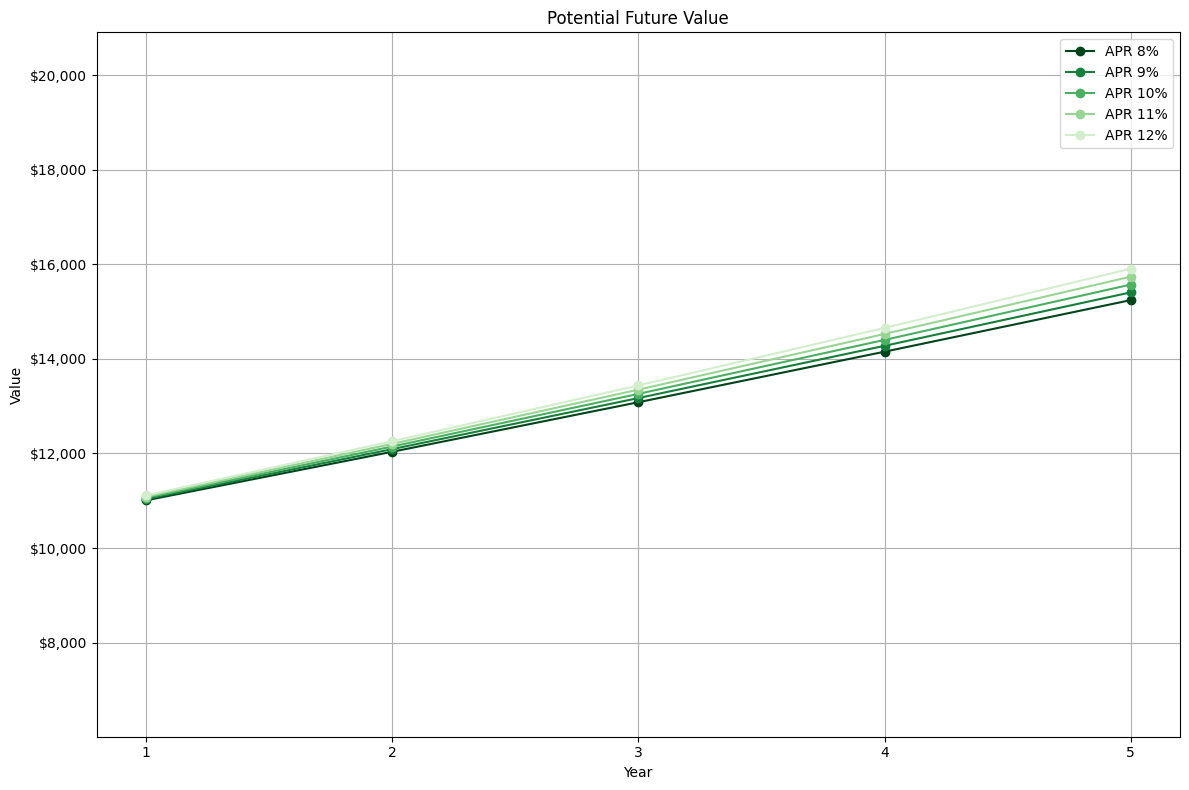

In [27]:
# Define a function to format y-axis labels as dollars
def dollar_formatter(x, pos):
    return "${:,.0f}".format(x)

# Plotting the results by year
plt.figure(figsize=(12, 8))

# Store the plotted lines for later customization
lines = []

# Set a base color (green) and use shades of this color
base_color = 'green'
cmap = get_cmap('Greens')
num_shades = len(future_values_by_year)

for i, (apr, future_values) in enumerate(future_values_by_year.items()):
    line, = plt.plot(range(1, investment_time + 1), future_values, marker='o', label=f'APR {apr}%', color=cmap(1 - i / num_shades))
    lines.append(line)

plt.title('Potential Future Value')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()
plt.grid(True)


# Set x-axis major locator to show whole numbers only
plt.gca().xaxis.set_major_locator(MultipleLocator(1))

# Set y-axis formatter to display as dollars
plt.gca().yaxis.set_major_formatter(FuncFormatter(dollar_formatter))

# Adjust y-axis limits for better visibility
plt.ylim(bottom=min(min(future_values) for future_values in future_values_by_year.values()) - 5000,
         top=max(max(future_values) for future_values in future_values_by_year.values()) + 5000)

# Enable tooltips with mplcursors
cursor = mplcursors.cursor(lines)

@cursor.connect("add")
def on_add(sel):
    label = lines[sel.artist_index].get_label()
    year = int(sel.target[0])
    value = sel.target[1]
    sel.annotation.set_text(f"{label}\nYear: {year}\nValue: ${value:,.2f}")

plt.tight_layout()
plt.show()